#*Entrega Final*

**Carlos Mario Vergara**

# **Ejemplo de aplicación con k-means para el dataset de Iris**

**Descripción del dataset:**

**Objetivo:** El dataset Iris es utilizado para problemas de clasificación. El objetivo es predecir la especie de una flor de iris (clasificación) basada en las medidas de sus características físicas.

**Clases:** Hay tres clases (especies) de flores:

*   Setosa
*   Versicolor
*   Virginica

**Características:** El dataset contiene 150 observaciones, cada una con 4 características (medidas) que describen las flores:

* Largo del sépalo (en cm)
* Ancho del sépalo (en cm)
* Largo del pétalo (en cm)
* Ancho del pétalo (en cm)

**Distribución de las clases:**

* Cada clase tiene 50 ejemplos.
* Las clases Setosa y Versicolor están perfectamente separadas linealmente, mientras que Versicolor y Virginica están algo superpuestas, lo que hace que la clasificación entre estas últimas dos sea más difícil.

**Parte 1: Determinación del número óptimo de clusters**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.5 MB/s eta 0:00:00


<ipython-input-1-f1ba86103a41>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, distortions, 'bo-', markersize=8, linewidth=2, color='darkorange')


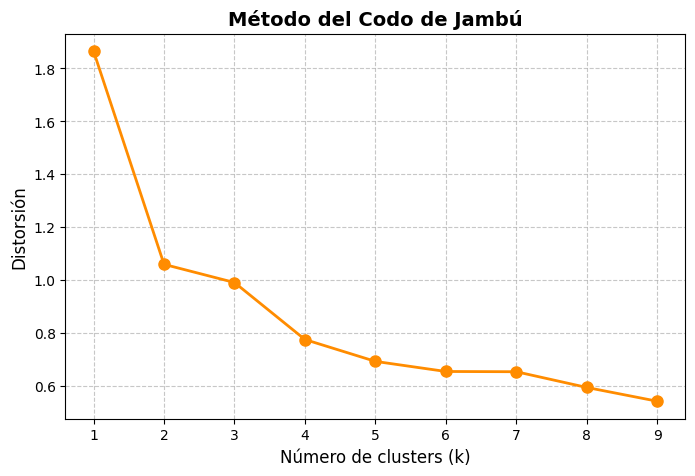

<ipython-input-1-f1ba86103a41>:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, silhouette_scores, 'bo-', markersize=8, linewidth=2, color='mediumseagreen')


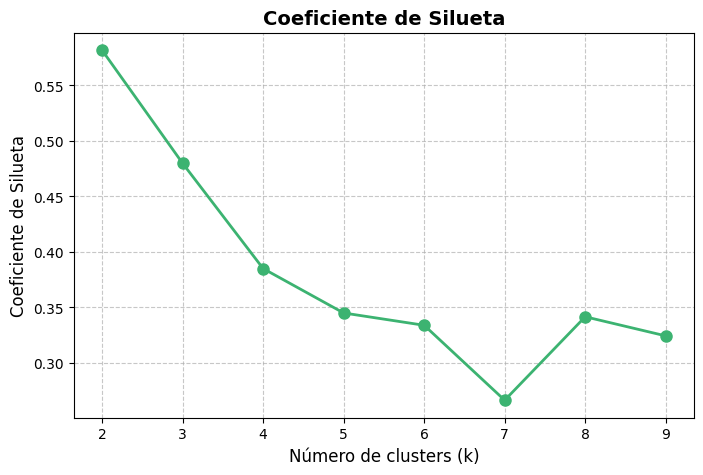

<ipython-input-1-f1ba86103a41>:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, db_scores, 'bo-', markersize=8, linewidth=2, color='steelblue')


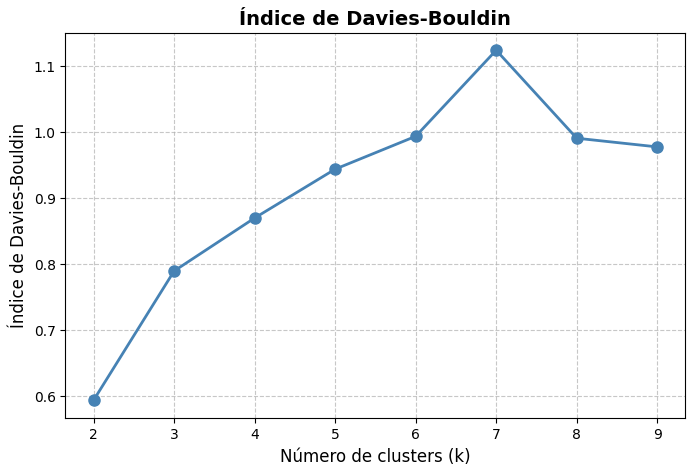

<ipython-input-1-f1ba86103a41>:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, dunn_scores, 'bo-', markersize=8, linewidth=2, color='crimson')


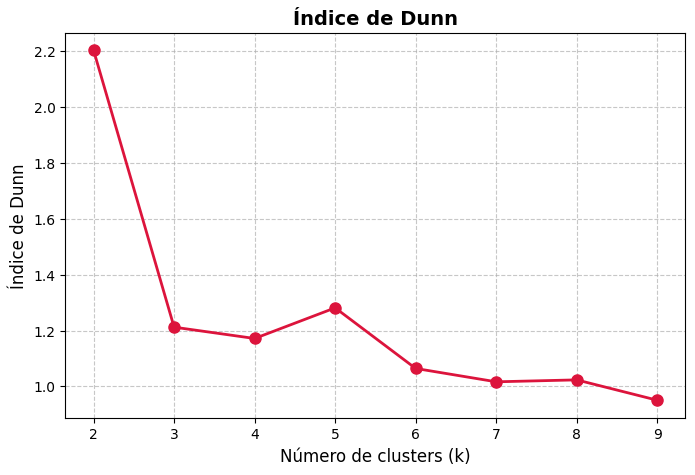

In [ ]:
# Instalar librerías necesarias
!pip install -U scikit-learn
!pip install scikit-learn-extra

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn_extra.cluster import KMedoids
from scipy.spatial.distance import cdist

# Cargar el dataset de Iris
iris = load_iris()
X = iris.data

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Método del Codo de Jambú
def plot_elbow_method(X):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, 'bo-', markersize=8, linewidth=2, color='darkorange')
    plt.xlabel('Número de clusters (k)', fontsize=12)
    plt.ylabel('Distorsión', fontsize=12)
    plt.title('Método del Codo de Jambú', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# 2. Coeficiente de Silueta
def plot_silhouette_scores(X):
    silhouette_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    plt.figure(figsize=(8, 5))
    plt.plot(K, silhouette_scores, 'bo-', markersize=8, linewidth=2, color='mediumseagreen')
    plt.xlabel('Número de clusters (k)', fontsize=12)
    plt.ylabel('Coeficiente de Silueta', fontsize=12)
    plt.title('Coeficiente de Silueta', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# 3. Índice de Davies-Bouldin
def plot_davies_bouldin_scores(X):
    db_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        db_scores.append(davies_bouldin_score(X, kmeans.labels_))

    plt.figure(figsize=(8, 5))
    plt.plot(K, db_scores, 'bo-', markersize=8, linewidth=2, color='steelblue')
    plt.xlabel('Número de clusters (k)', fontsize=12)
    plt.ylabel('Índice de Davies-Bouldin', fontsize=12)
    plt.title('Índice de Davies-Bouldin', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# 4. Índice de Dunn
def calculate_dunn_index(X, labels):
    distances = cdist(X, X, metric='euclidean')
    inter_cluster_distances = []
    intra_cluster_distances = []

    for i in range(np.max(labels) + 1):
        points_in_cluster = np.where(labels == i)[0]
        if len(points_in_cluster) > 1:
            intra_cluster_distances.append(np.mean(distances[np.ix_(points_in_cluster, points_in_cluster)]))

    for i in range(np.max(labels) + 1):
        for j in range(i + 1, np.max(labels) + 1):
            points_in_cluster_i = np.where(labels == i)[0]
            points_in_cluster_j = np.where(labels == j)[0]
            inter_cluster_distances.append(np.mean(distances[np.ix_(points_in_cluster_i, points_in_cluster_j)]))

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

def plot_dunn_index(X):
    dunn_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        dunn_scores.append(calculate_dunn_index(X, kmeans.labels_))

    plt.figure(figsize=(8, 5))
    plt.plot(K, dunn_scores, 'bo-', markersize=8, linewidth=2, color='crimson')
    plt.xlabel('Número de clusters (k)', fontsize=12)
    plt.ylabel('Índice de Dunn', fontsize=12)
    plt.title('Índice de Dunn', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Ejecutar las funciones y mostrar gráficos
plot_elbow_method(X_scaled)
plot_silhouette_scores(X_scaled)
plot_davies_bouldin_scores(X_scaled)
plot_dunn_index(X_scaled)

**Parte 2: Clasificación de los tipos de flores basados en número k de clusters y evaluación de resultados**

Etiquetas reales: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predicciones de clusters: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


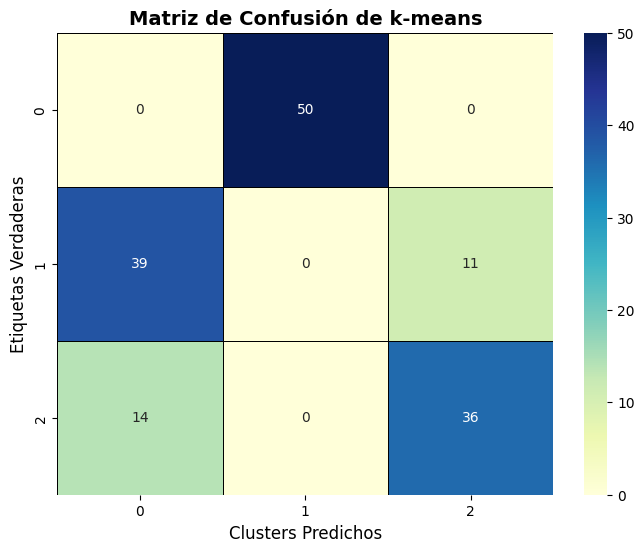

Overall Accuracy: 0.8333
Precisión ARI: 0.6201
El algoritmo k-means con 3 clusters tiene una similitud con las etiquetas reales (ARI) de 0.6201.


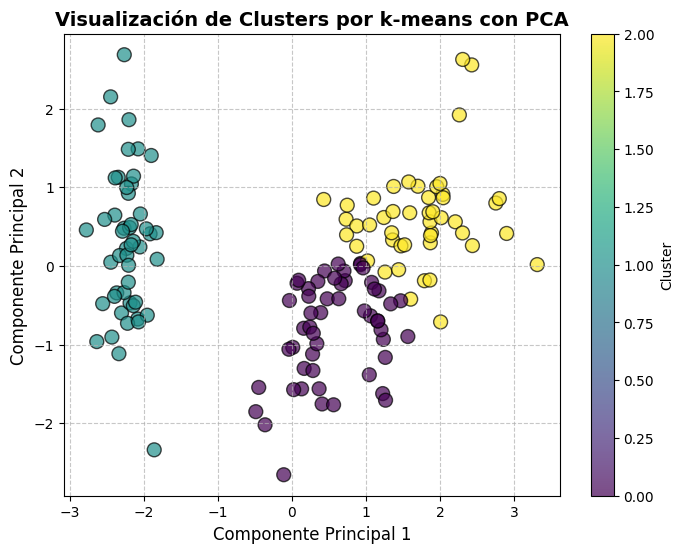

In [ ]:
# Importar las librerías necesarias para el análisis
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
import seaborn as sns
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Cargar el dataset de Iris
iris = load_iris()

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

# Definir el número de clusters que decidimos tras la evaluación
num_clusters = 3  # Puedes cambiar este valor según los resultados del análisis

# Aplicar k-means con el número seleccionado de clusters y múltiples inicializaciones
kmeans = KMeans(n_clusters=num_clusters, n_init=50, random_state=42)
kmeans.fit(X_scaled)

# Predicciones de cluster del modelo
labels_pred = kmeans.labels_

# Visualizar las etiquetas originales y las predicciones
print("Etiquetas reales:", iris.target)
print("Predicciones de clusters:", labels_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(iris.target, labels_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='d', cbar=True, linewidths=0.5, linecolor='black')
plt.xlabel('Clusters Predichos', fontsize=12)
plt.ylabel('Etiquetas Verdaderas', fontsize=12)
plt.title('Matriz de Confusión de k-means', fontsize=14, fontweight='bold')
plt.show()

# Ajustar las etiquetas predichas para alinearlas con las etiquetas reales
def map_clusters_to_labels(conf_matrix):
    # Usamos la optimización del algoritmo Hungarian para encontrar el mejor mapeo entre clusters y etiquetas reales
    row_ind, col_ind = linear_sum_assignment(-conf_matrix)
    return col_ind

# Mapeo óptimo de clusters a etiquetas
mapping = map_clusters_to_labels(conf_matrix)

# Ajustar las predicciones de clusters según el mapeo óptimo
labels_pred_adjusted = np.array([mapping[label] for label in labels_pred])

# Calcular la precisión general (Overall Accuracy)
overall_accuracy = accuracy_score(iris.target, labels_pred_adjusted)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

# Calcular y mostrar el ARI (Adjusted Rand Index)
ari_score = adjusted_rand_score(iris.target, labels_pred)
print(f"Precisión ARI: {ari_score:.4f}")

# Análisis de precisión del clustering
if num_clusters == 3:
    print(f"El algoritmo k-means con {num_clusters} clusters tiene una similitud con las etiquetas reales (ARI) de {ari_score:.4f}.")
else:
    print(f"El número de clusters seleccionado es {num_clusters}. Evalúa si los resultados del clustering son coherentes con las especies reales.")

# Visualización PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar los resultados del clustering en el espacio PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred, cmap='viridis', marker='o', s=100, alpha=0.7, edgecolor='k')
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.title('Visualización de Clusters por k-means con PCA', fontsize=14, fontweight='bold')
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


# **Taller 6 - Parte 1**


1.  **Número óptimo de clusters:** Basados en el ejercicio del dataset de Iris y la aplicación de los 4 métodos para determinar el número óptimo de cluster, ¿Qué número de clusters les sugiere cada uno de los gráficos? ¿Son coherentes con el número de especies en el dataset?. Discute sobre el resultado indicado por cada método.
2.   **Impacto de la normalización de datos:** ¿Cómo afecta la normalización de los datos al rendimiento del algoritmo k-means? Aplica k-means al dataset sin normalización y luego con normalización usando StandardScaler. ¿Qué diferencias encuentras en el número de iteraciones, la precisión (si se compara con etiquetas reales) y la estabilidad de los clusters?. Deben implementar k-means en ambas versiones del dataset (normalizado y no normalizado) y comparar los resultados en cuanto a tiempo de ejecución, número de iteraciones y precisión.
3.   **Uso de diferentes métricas de distancia:** K-means utiliza la distancia euclidiana por defecto, pero ¿cómo afecta el uso de otras métricas de distancia, como la distancia de Manhattan o la de Coseno? Implementa k-means utilizando al menos dos métricas de distancia adicionales y compara los resultados en cuanto a la coherencia de los clusters y el tiempo de ejecución. Deben modificar el algoritmo k-means o usar librerías que permitan el uso de métricas de distancia diferentes y realizar una evaluación de las diferencias en la agrupación de datos, tiempo de ejecución y número de iteraciones.
4.   **Comparación de tiempo de ejecución con diferentes inicializaciones:** K-means puede ser sensible a las inicializaciones. ¿Cómo afecta el número de inicializaciones aleatorias (n_init) al tiempo de ejecución y al resultado final de los clusters? Prueba con n_init=1, n_init=10 y n_init=100. Deben implementar k-means con diferentes valores de n_init y analizar el impacto en tiempo de ejecución, estabilidad de los clusters y calidad de los resultados (usando métricas como el coeficiente de silueta o la distancia intra-cluster).


#**Punto 1**

#*1.Encontramos el óptimo de clusters segun los graficos*.

In [ ]:
import pandas as pd


data = {'codo': 2, 'silueta': 7, 'davies': 7, 'dunn': 3}


table = pd.DataFrame(data, index=['Número de Clusters'])

# Aplicar estilos a la tabla
styled_table = table.style.set_properties(**{
    'background-color': '#f7f7f7',
    'border': '1px solid black',
    'color': 'black',
    'font-size': '14px',
    'text-align': 'center'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#4CAF50'),
              ('color', 'white'),
              ('font-size', '16px'),
              ('border', '1px solid black')]
}]).highlight_max(color='lightgreen', axis=1).highlight_min(color='lightcoral', axis=1)

# Mostrar la tabla con estilos
styled_table

,codo,silueta,davies,dunn
Número de Clusters,2,7,7,3


**Partimos a realizar los clusters K = 2 Y K = 7 para analizar su respectiva distribución.**

#*Convertir iris a dataframe*

In [ ]:

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


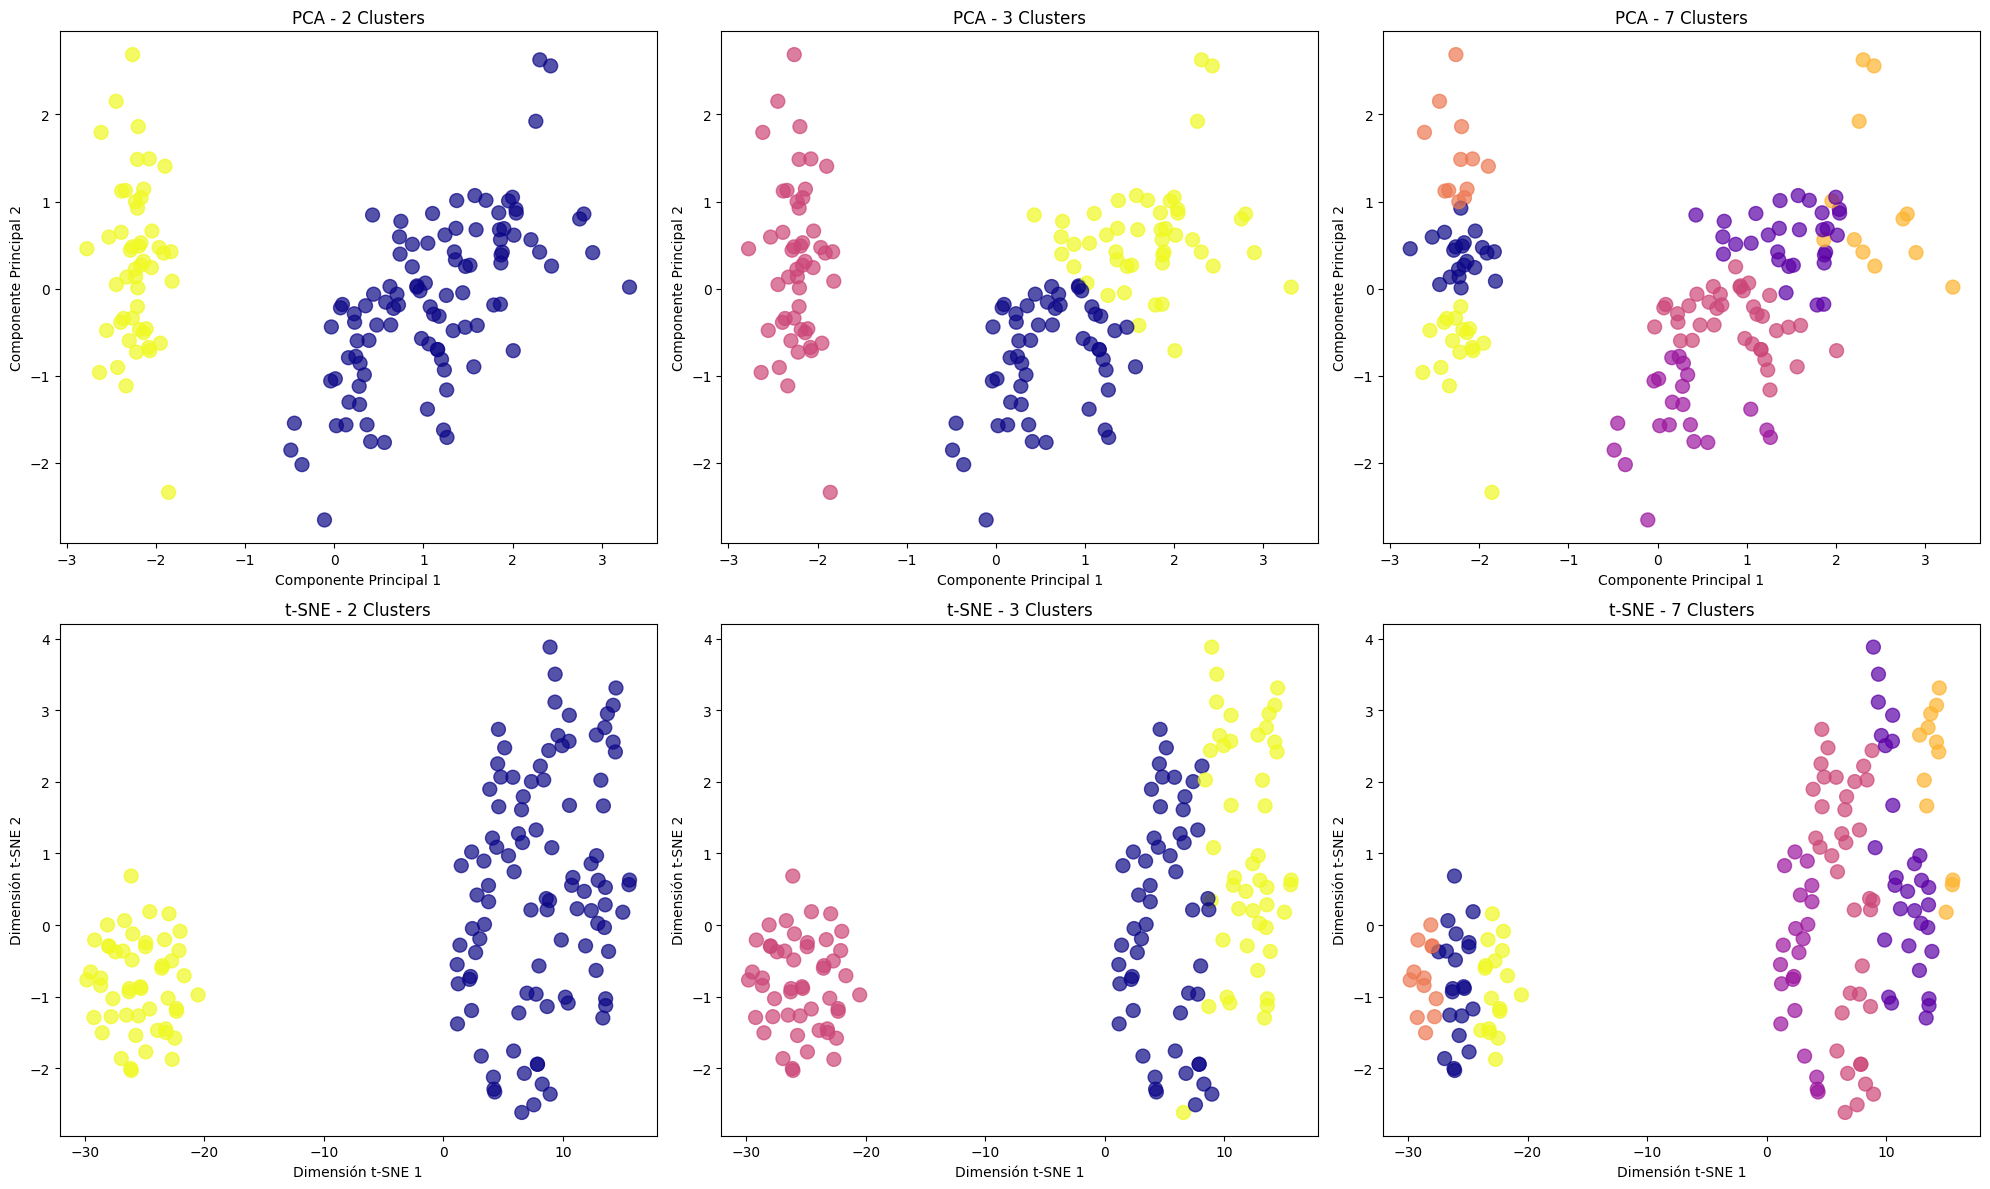

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Cargar el dataset Iris
iris = load_iris()
X = iris.data

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir una lista con el número de clusters a visualizar
num_clusters_list = [2, 3, 7]

# Crear una figura y subplots
plt.figure(figsize=(20, 12))

# Crear listas para almacenar los objetos KMeans y las etiquetas predichas
kmeans_objects = []
labels_pred_list = []

# Iterar a través de la lista de números de clusters
for i, num_clusters in enumerate(num_clusters_list):
    # Aplicar KMeans con el número actual de clusters
    kmeans = KMeans(n_clusters=num_clusters, n_init=50, random_state=42)
    kmeans.fit(X_scaled)
    kmeans_objects.append(kmeans)
    labels_pred = kmeans.labels_
    labels_pred_list.append(labels_pred)

    # Aplicar PCA con 2 componentes para visualización
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Aplicar t-SNE con 2 componentes para visualización
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    # Crear subplots para PCA y t-SNE
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred, cmap='plasma', marker='o', s=100, alpha=0.7)
    plt.title(f'PCA - {num_clusters} Clusters')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')

    plt.subplot(2, 3, i + 4)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_pred, cmap='plasma', marker='o', s=100, alpha=0.7)
    plt.title(f't-SNE - {num_clusters} Clusters')
    plt.xlabel('Dimensión t-SNE 1')
    plt.ylabel('Dimensión t-SNE 2')

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

**¿Uso de t-SNE ? Además de PCA,en esta ocación utilicé t-SNE debido a su versatilidad de capturar estructuras no lineales en los datos, lo que lo hace ideal para visualizar datos complejos para la reducción de dimensionalidad, quise hacer el ejercicio de compararlo con PCA y pude deducir su útilidad para visualizar clusters en espacios de alta dimensionalidad, ya que preserva mejor las relaciones locales entre los puntos.**



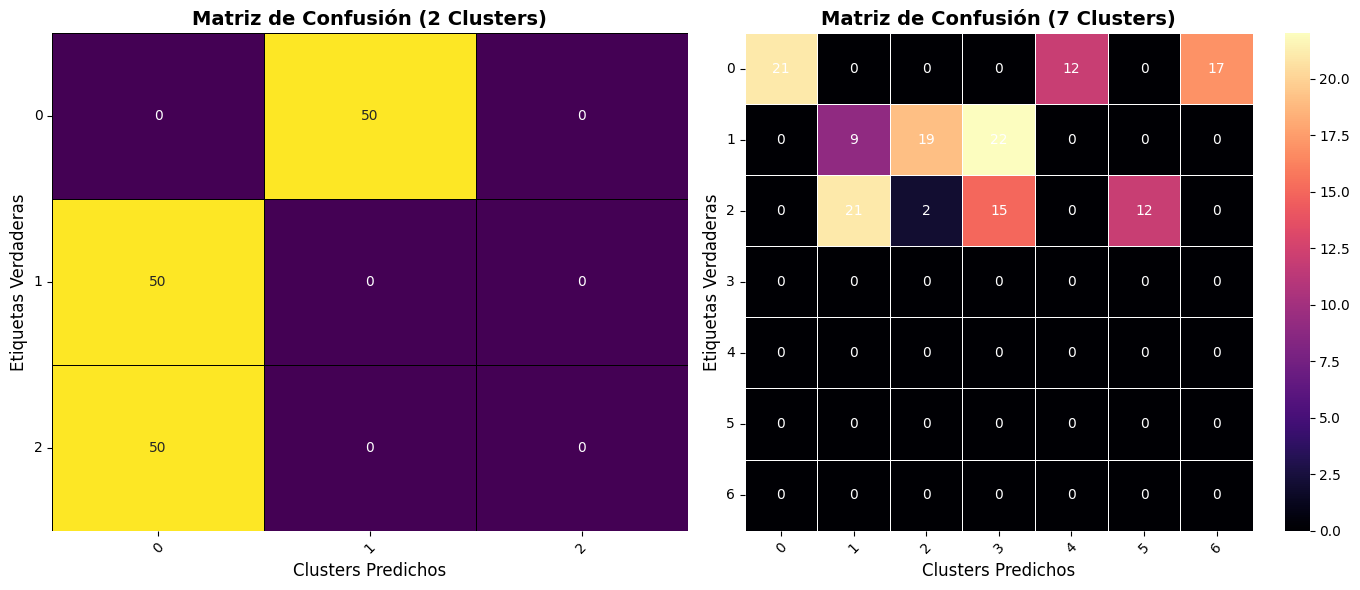

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris

# Cargar el dataset Iris
iris = load_iris()


# Matriz de confusión para 2 clusters
conf_matrix_2 = confusion_matrix(iris.target, labels_pred_list[0])

# Matriz de confusión para 7 clusters
conf_matrix_7 = confusion_matrix(iris.target, labels_pred_list[2])

# Crear una figura con dos subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Matriz de confusión para 2 clusters
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_2, annot=True, cmap='viridis', fmt='d', cbar=False, linewidths=0.5, linecolor='black')
plt.xlabel('Clusters Predichos', fontsize=12)
plt.ylabel('Etiquetas Verdaderas', fontsize=12)
plt.title('Matriz de Confusión (2 Clusters)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Subplot 2: Matriz de confusión para 7 clusters
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_7, annot=True, cmap='magma', fmt='d', cbar=True, linewidths=0.5, linecolor='white',
            annot_kws={'size': 10, 'color': 'white'})
plt.xlabel('Clusters Predichos', fontsize=12)
plt.ylabel('Etiquetas Verdaderas', fontsize=12)
plt.title('Matriz de Confusión (7 Clusters)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, adjusted_rand_score
from scipy.optimize import linear_sum_assignment


def map_clusters_to_labels(conf_matrix):

    row_ind, col_ind = linear_sum_assignment(-conf_matrix)
    mapping = {cluster: true_label for cluster, true_label in zip(col_ind, row_ind)}
    return mapping

# Calcular métricas para 2 clusters
conf_matrix_2 = confusion_matrix(iris.target, labels_pred_list[0])
mapping2 = map_clusters_to_labels(conf_matrix_2)
labels_pred_adjusted2 = np.array([mapping2[label] for label in labels_pred_list[0]])

# Overall Accuracy para 2 clusters
overall_accuracy2 = accuracy_score(iris.target, labels_pred_adjusted2)
print(f"Overall Accuracy (2 clusters): {overall_accuracy2:.4f}")

#  Rand Index (ARI) para 2 clusters
ari_score2 = adjusted_rand_score(iris.target, labels_pred_list[0])
print(f"Precisión ARI (2 clusters): {ari_score2:.4f}")

# Calcular para 7 clusters
conf_matrix_7 = confusion_matrix(iris.target, labels_pred_list[2])
mapping7 = map_clusters_to_labels(conf_matrix_7)
labels_pred_adjusted7 = np.array([mapping7[label] for label in labels_pred_list[2]])

# Overall Accuracy para 7 clusters
overall_accuracy7 = accuracy_score(iris.target, labels_pred_adjusted7)
print(f"Overall Accuracy (7 clusters): {overall_accuracy7:.4f}")

# Rand Index (ARI) para 7 clusters
ari_score7 = adjusted_rand_score(iris.target, labels_pred_list[2])
print(f"Precisión ARI (7 clusters): {ari_score7:.4f}")

Overall Accuracy (2 clusters): 0.6667
Precisión ARI (2 clusters): 0.5681
Overall Accuracy (7 clusters): 0.4267
Precisión ARI (7 clusters): 0.3003


¿Son coherentes con el número de especies en el dataset?. Discute sobre el resultado indicado por cada método.

Al aumentar el número de clusters a 3, tanto la Overall Accuracy (de 66.67% a 83.33%) como el ARI (de 0.5681 a 0.6201) mejoran. Con lo que se confirma que, para el caso concreto, el número de clusters más adecuado son 3, coincidiendo con el número de clases reales del dataset Iris. Al aumentar el número de clusters a 7, tanto la Overall Accuracy como el ARI disminuyen dramáticamente(Overall Accuracy: 0.4267, ARI: 0.3003). Esto evidencia que un número de clusters excesivos, acaban dividiendo los datos en grupos que no se correspondan con la estructura real de datos. Por tanto, de los resultados obtenidos a la hora de seleccionar el número de clusters y evitar problemas de sobreajuste que puedan llevarnos a dividir datasets en grupos que no se correspondan con clases naturales. Útil, para intentar averiguar cómo de bien ha representado nuestros datos el algoritmo k-means a través de sus clusters.

#**Punto 2**

#*K-means datos sin escalar*.

Etiquetas reales: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predicciones de clusters: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Overall Accuracy: 0.8933
Precisión ARI: 0.7302
El algoritmo k-means con 3 clusters tiene una similitud con las etiquetas reales (ARI) de 0.7302.


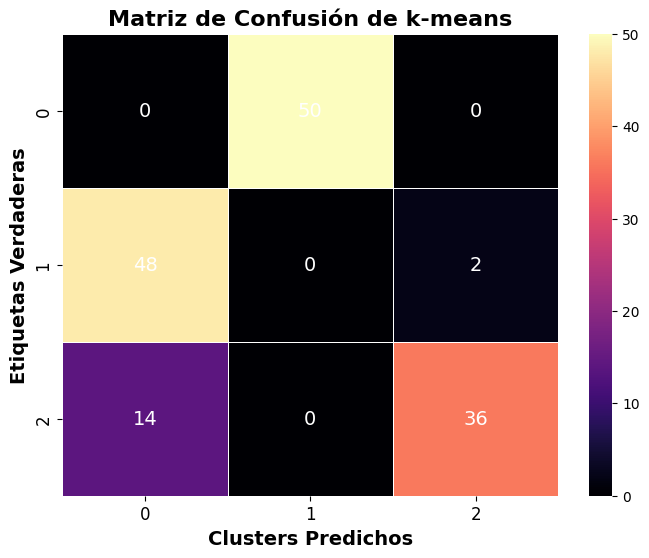

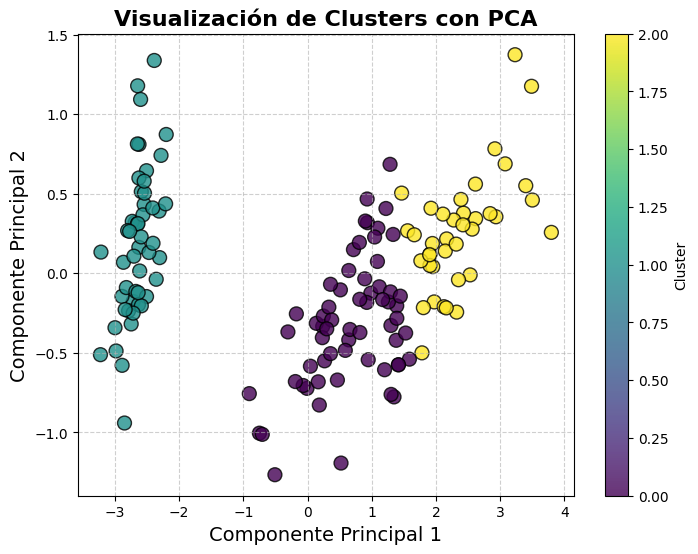

Tiempo de ejecución: 1.6703 segundos


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import PCA

# Iniciar el temporizador
start_chunk2 = time.time()

# Cargar el dataset Iris
iris = load_iris()
X2 = iris.data  # Datos sin escalar

# Definir el número de clusters
num_clusters = 3  # Número óptimo para el dataset Iris

# Aplicar k-means
kmeans2 = KMeans(n_clusters=num_clusters, n_init=50, random_state=42)
kmeans2.fit(X2)

# Predicciones de clusters
labels_pred2 = kmeans2.labels_

# Visualizar las etiquetas originales y las predicciones
print("Etiquetas reales:", iris.target)
print("Predicciones de clusters:", labels_pred2)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(iris.target, labels_pred2)

# Función para mapear clusters a etiquetas reales
def map_clusters_to_labels(conf_matrix):
    row_ind, col_ind = linear_sum_assignment(-conf_matrix)
    return col_ind

# Mapeo óptimo de clusters a etiquetas
mapping = map_clusters_to_labels(conf_matrix)

# Ajustar las predicciones de clusters según el mapeo óptimo
labels_pred2_adjusted = np.array([mapping[label] for label in labels_pred2])

# Calcular la precisión general (Overall Accuracy)
overall_accuracy2 = accuracy_score(iris.target, labels_pred2_adjusted)
print(f"Overall Accuracy: {overall_accuracy2:.4f}")

# Calcular y mostrar el ARI (Adjusted Rand Index)
ari_score2 = adjusted_rand_score(iris.target, labels_pred2)
print(f"Precisión ARI: {ari_score2:.4f}")

# Análisis de precisión del clustering
if num_clusters == 3:
    print(f"El algoritmo k-means con {num_clusters} clusters tiene una similitud con las etiquetas reales (ARI) de {ari_score2:.4f}.")
else:
    print(f"El número de clusters seleccionado es {num_clusters}. Evalúa si los resultados del clustering son coherentes con las especies reales.")

# Visualización de la matriz de confusión con diseño mejorado
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='magma', fmt='d', cbar=True,
            linewidths=0.5, linecolor='white', annot_kws={'size': 14, 'color': 'white'})
plt.xlabel('Clusters Predichos', fontsize=14, fontweight='bold')
plt.ylabel('Etiquetas Verdaderas', fontsize=14, fontweight='bold')
plt.title('Matriz de Confusión de k-means', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Visualización PCA
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X2)

# Graficar los resultados de PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels_pred2, cmap='viridis', s=100, alpha=0.8, edgecolor='k')
plt.title('Visualización de Clusters con PCA', fontsize=16, fontweight='bold')
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Finalizar el temporizador
end_chunk2 = time.time()
print(f"Tiempo de ejecución: {end_chunk2 - start_chunk2:.4f} segundos")

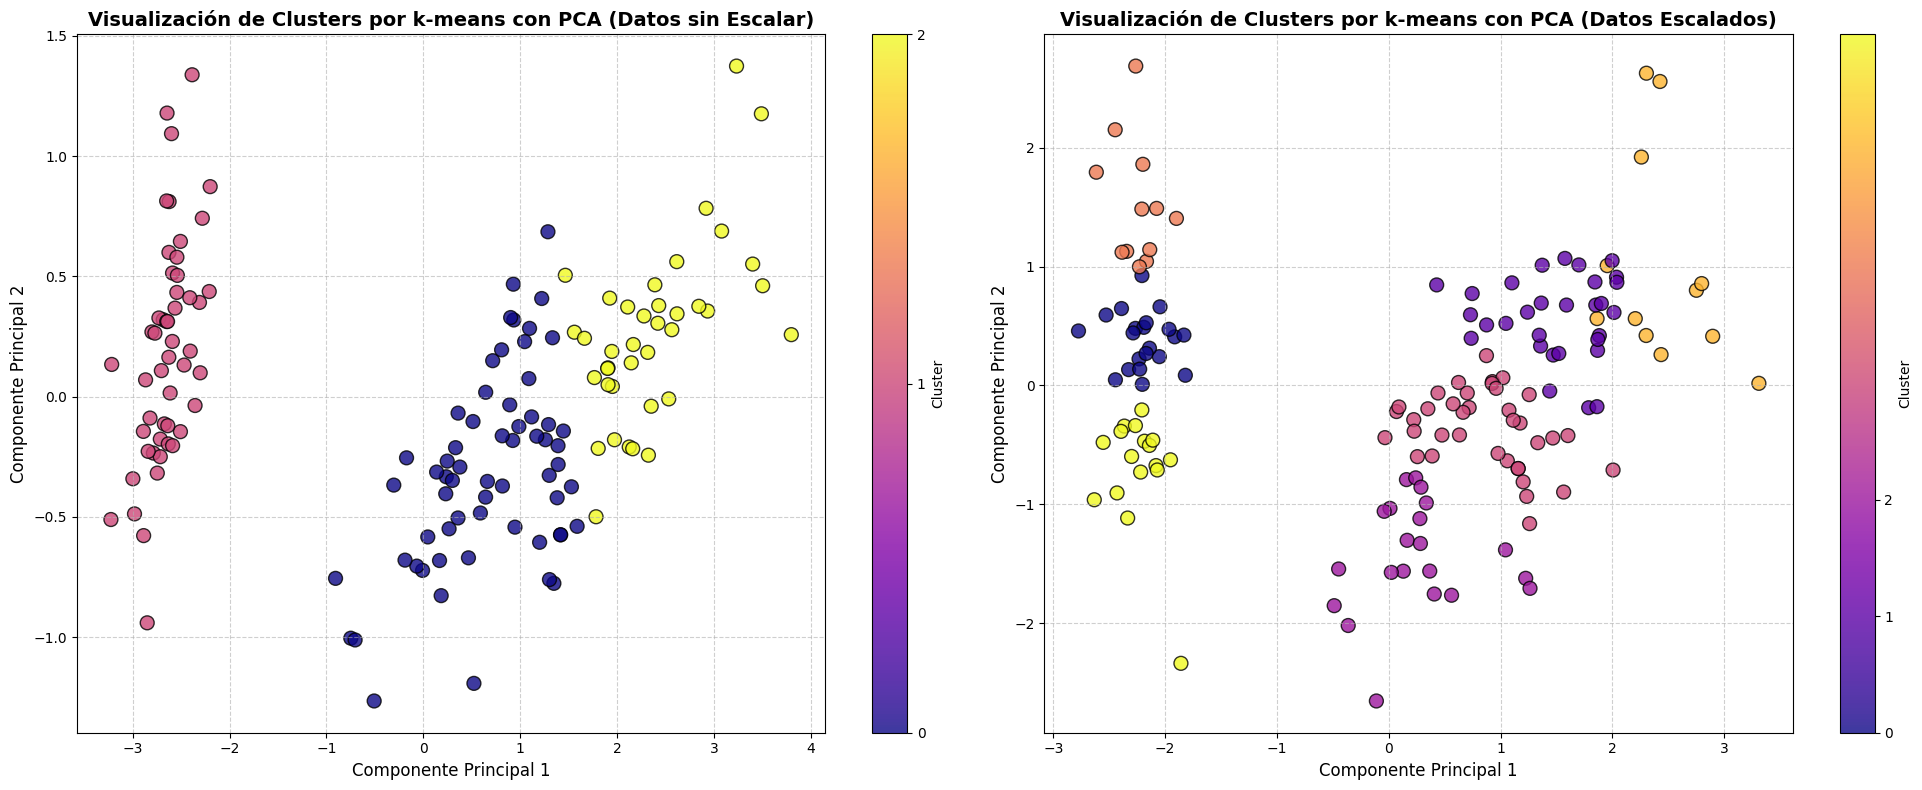

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura con dos subplots
plt.figure(figsize=(20, 8))

# Subplot 1: Visualización de clusters sin escalar
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels_pred2, cmap='plasma', marker='o', s=100, alpha=0.8, edgecolor='k')
plt.title('Visualización de Clusters por k-means con PCA (Datos sin Escalar)', fontsize=14, fontweight='bold')
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.colorbar(scatter1, label='Cluster', ticks=range(num_clusters))
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Visualización de clusters con escalado
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred, cmap='plasma', marker='o', s=100, alpha=0.8, edgecolor='k')
plt.title('Visualización de Clusters por k-means con PCA (Datos Escalados)', fontsize=14, fontweight='bold')
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.colorbar(scatter2, label='Cluster', ticks=range(num_clusters))
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd


t1 = 0.02
t2 = 0.01


# Calculate percentage differences
diff_accuracy = 100 * (overall_accuracy2 - overall_accuracy) / overall_accuracy
diff_ari = 100 * (ari_score2 - ari_score) / ari_score
diff_time = 100 * (t2 - t1) / t1  # Percentage difference in computation time

# Create the data dictionary
datat = {
    'Precisión General': [overall_accuracy, overall_accuracy2, diff_accuracy],
    'ARI Score': [ari_score, ari_score2, diff_ari],
    'Tiempo de Cómputo (s)': [t1, t2, diff_time]
}

# Create the DataFrame
table = pd.DataFrame(datat, index=['Escalado', 'No Escalado', 'Diferencia (%)'])

# Improve table formatting
table.style.format({
    'Precisión General': '{:.4f}',
    'ARI Score': '{:.4f}',
    'Tiempo de Cómputo (s)': '{:.4f}'
}).applymap(lambda x: 'color: red' if isinstance(x, float) and x < 0 else 'color: black')

# Display the table
print("Tabla Comparativa: k-means Escalado vs No Escalado")
display(table)

Tabla Comparativa: k-means Escalado vs No Escalado


<ipython-input-18-1283aa6b8920>:29: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  }).applymap(lambda x: 'color: red' if isinstance(x, float) and x < 0 else 'color: black')


,Precisión General,ARI Score,Tiempo de Cómputo (s)
Escalado,0.833333,0.620135,0.02
No Escalado,0.893333,0.730238,0.01
Diferencia (%),7.200000,17.754692,-50.00


#**Conclusiones**.

**Partiendo del procedimiento escalado y no escalado observamos como desde el primero hay mayor número de particiones entre los datos (7 clusters), puesto que al proceder al siguiente sólo encontramos 3 clusters. Más allá de esto según los datos extraidos en la tabla es evidente la baja diferencia entre las precisiones entre ambos, a pesar de marcar un 17% en ARI Score, siendo el no escalado más favorable (0.730238), pero me decanto más por el tiempo de computo (s) siendo el más efectivo con o.01 segundos registrados.**


In [ ]:

from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances

#**Punto. 3**

Etiquetas reales: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predicciones de clusters: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0
 0 2 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Overall Accuracy: 0.9000
Precisión ARI: 0.7437
El algoritmo k-medoids con 3 clusters tiene una similitud con las etiquetas reales (ARI) de 0.7437.


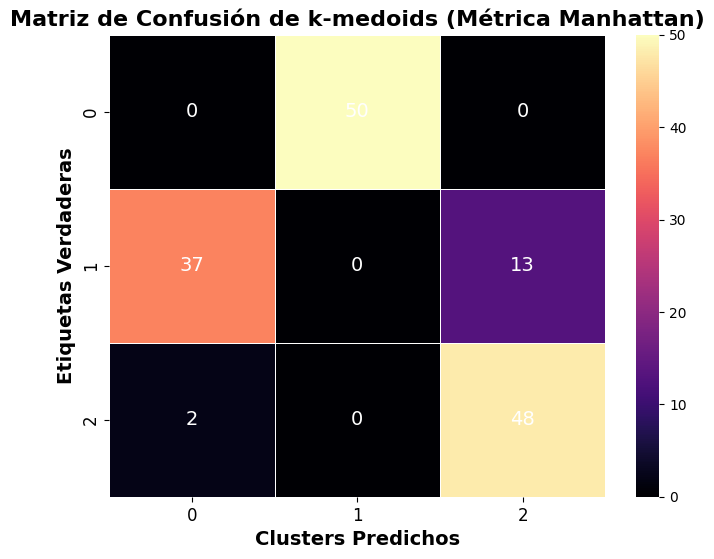

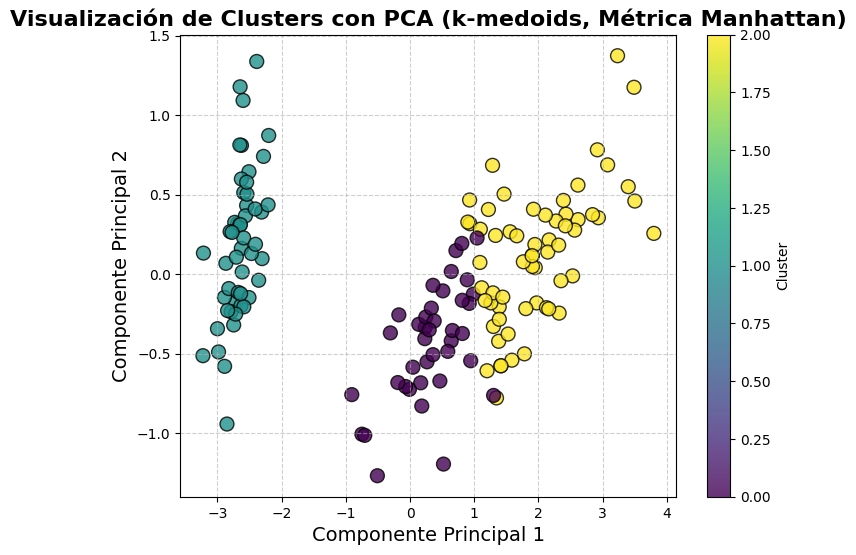

Tiempo de ejecución: 0.5686 segundos


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn_extra.cluster import KMedoids  # Usamos KMedoids en lugar de KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Iniciar el temporizador
start_chunk3 = time.time()

# Cargar el dataset Iris
iris = load_iris()
X2 = iris.data  # Datos sin escalar

# Definir el número de clusters
num_clusters = 3  # Número óptimo para el dataset Iris

# Aplicar k-medoids con la métrica Manhattan
kmeans3 = KMedoids(n_clusters=num_clusters, metric='manhattan', random_state=42)
kmeans3.fit(X2)

# Predicciones de clusters
labels_pred3 = kmeans3.labels_

# Visualizar las etiquetas originales y las predicciones
print("Etiquetas reales:", iris.target)
print("Predicciones de clusters:", labels_pred3)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(iris.target, labels_pred3)

# Función para mapear clusters a etiquetas reales
def map_clusters_to_labels(conf_matrix):
    row_ind, col_ind = linear_sum_assignment(-conf_matrix)
    return col_ind

# Mapeo óptimo de clusters a etiquetas
mapping = map_clusters_to_labels(conf_matrix)

# Ajustar las predicciones de clusters según el mapeo óptimo
labels_pred3_adjusted = np.array([mapping[label] for label in labels_pred3])

# Calcular la precisión general (Overall Accuracy)
overall_accuracy3 = accuracy_score(iris.target, labels_pred3_adjusted)
print(f"Overall Accuracy: {overall_accuracy3:.4f}")

# Calcular y mostrar el ARI (Adjusted Rand Index)
ari_score3 = adjusted_rand_score(iris.target, labels_pred3)
print(f"Precisión ARI: {ari_score3:.4f}")

# Análisis de precisión del clustering
if num_clusters == 3:
    print(f"El algoritmo k-medoids con {num_clusters} clusters tiene una similitud con las etiquetas reales (ARI) de {ari_score3:.4f}.")
else:
    print(f"El número de clusters seleccionado es {num_clusters}. Evalúa si los resultados del clustering son coherentes con las especies reales.")

# Visualización de la matriz de confusión con diseño mejorado
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='magma', fmt='d', cbar=True,
            linewidths=0.5, linecolor='white', annot_kws={'size': 14, 'color': 'white'})
plt.xlabel('Clusters Predichos', fontsize=14, fontweight='bold')
plt.ylabel('Etiquetas Verdaderas', fontsize=14, fontweight='bold')
plt.title('Matriz de Confusión de k-medoids (Métrica Manhattan)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Visualización PCA
pca = PCA(n_components=2)
X_pca3 = pca.fit_transform(X2)

# Graficar los resultados de PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=labels_pred3, cmap='viridis', s=100, alpha=0.8, edgecolor='k')
plt.title('Visualización de Clusters con PCA (k-medoids, Métrica Manhattan)', fontsize=16, fontweight='bold')
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Finalizar el temporizador
end_chunk3 = time.time()
print(f"Tiempo de ejecución: {end_chunk3 - start_chunk3:.4f} segundos")


RESULTADOS DE K-MEDOIDS CON MÉTRICA COSENO
Número de clusters: 3
Tiempo de ejecución: 0.55 segundos
Accuracy (tras alineamiento): 0.1267
Índice Rand Ajustado (ARI): 0.6038
--------------------------------------------------
Distribución de instancias por cluster:
  Cluster 0 → versicolor: 61 instancias (40.7%)
  Cluster 1 → virginica: 50 instancias (33.3%)
  Cluster 2 → setosa: 39 instancias (26.0%)


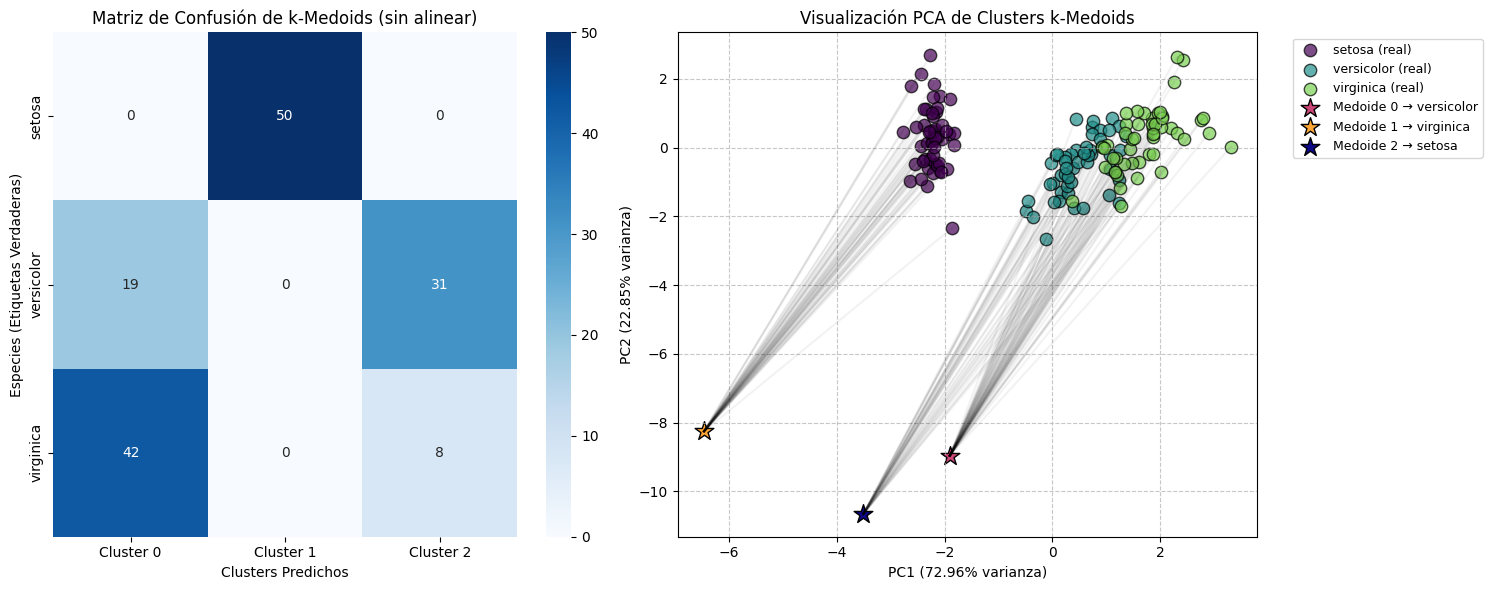

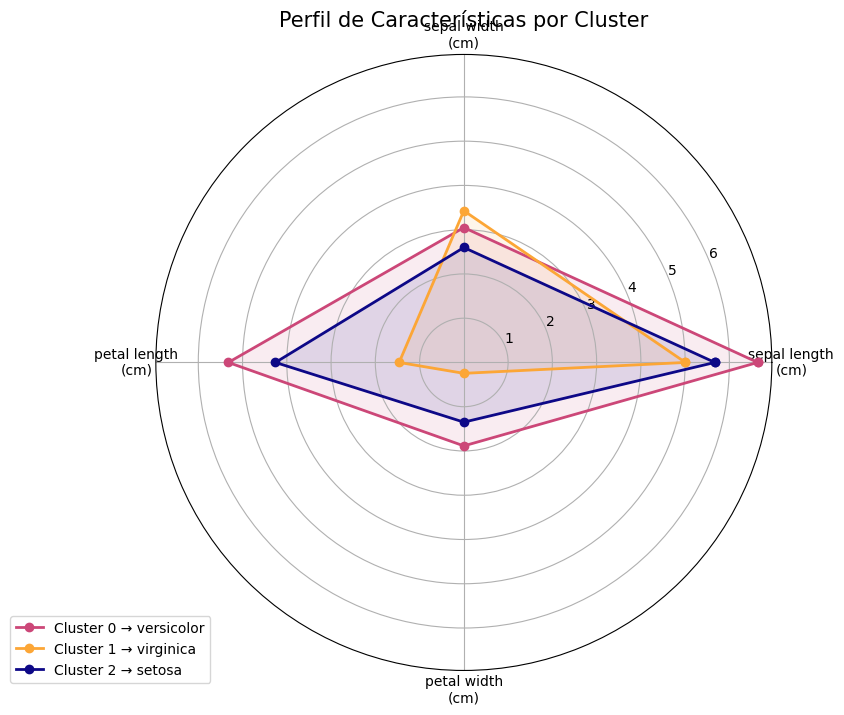

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from scipy.optimize import linear_sum_assignment
import matplotlib.cm as cm

# Cargamos y preparamos los datos
start_time = time.time()
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Escalamos las características para mejor rendimiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos k-Medoids con métrica de coseno
n_clusters = 3
kmedoids = KMedoids(
    n_clusters=n_clusters,
    metric='cosine',
    method='pam',
    init='k-medoids++',
    max_iter=300,
    random_state=42
)

# Entrenamos el modelo
y_pred = kmedoids.fit_predict(X_scaled)

# Obtenemos los medoides (centros de clusters)
medoids = kmedoids.cluster_centers_

# Visualizamos los resultados iniciales
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(
    conf_matrix,
    annot=True,
    cmap='Blues',
    fmt='d',
    xticklabels=[f'Cluster {i}' for i in range(n_clusters)],
    yticklabels=target_names,
    ax=axes[0]
)
axes[0].set_xlabel('Clusters Predichos')
axes[0].set_ylabel('Especies (Etiquetas Verdaderas)')
axes[0].set_title('Matriz de Confusión de k-Medoids (sin alinear)')

# Alineamos las etiquetas de clusters con las etiquetas reales
# usando el algoritmo húngaro para optimización
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
mapping = dict(zip(range(n_clusters), col_ind))
y_pred_aligned = np.array([mapping[label] for label in y_pred])

# Calculamos métricas de rendimiento
accuracy = accuracy_score(y_true, y_pred_aligned)
ari = adjusted_rand_score(y_true, y_pred)

# 2. Visualización con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Colores para las etiquetas reales y predicciones alineadas
colors_true = cm.viridis(np.array([0, 0.5, 0.8]))
colors_pred = cm.plasma(np.array([0, 0.5, 0.8]))

# Graficamos los datos con colores por especie (etiqueta real)
for i, species in enumerate(target_names):
    axes[1].scatter(
        X_pca[y_true == i, 0],
        X_pca[y_true == i, 1],
        alpha=0.7,
        color=colors_true[i],
        edgecolor='k',
        s=80,
        label=f"{species} (real)"
    )

# Graficamos los medoides proyectados en PCA
medoids_pca = pca.transform(scaler.transform(medoids))
for i in range(n_clusters):
    axes[1].scatter(
        medoids_pca[i, 0],
        medoids_pca[i, 1],
        s=200,
        marker='*',
        color=colors_pred[mapping[i]],
        edgecolor='k',
        label=f"Medoide {i} → {target_names[mapping[i]]}"
    )

# Añadimos líneas desde los puntos a sus medoides para mostrar la asignación
for i in range(len(X_pca)):
    cluster = y_pred[i]
    plt.plot(
        [X_pca[i, 0], medoids_pca[cluster, 0]],
        [X_pca[i, 1], medoids_pca[cluster, 1]],
        'k-',
        alpha=0.05
    )

axes[1].set_title('Visualización PCA de Clusters k-Medoids')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
axes[1].legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize=9)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

# Mostramos un resumen detallado de resultados
print("\n" + "="*50)
print(f"RESULTADOS DE K-MEDOIDS CON MÉTRICA COSENO")
print("="*50)
print(f"Número de clusters: {n_clusters}")
print(f"Tiempo de ejecución: {time.time() - start_time:.2f} segundos")
print(f"Accuracy (tras alineamiento): {accuracy:.4f}")
print(f"Índice Rand Ajustado (ARI): {ari:.4f}")
print("-"*50)
print("Distribución de instancias por cluster:")
for i in range(n_clusters):
    cluster_size = np.sum(y_pred == i)
    print(f"  Cluster {i} → {target_names[mapping[i]]}: {cluster_size} instancias ({cluster_size/len(X)*100:.1f}%)")
print("="*50)

# Diagrama de radar para comparar clusters
plt.figure(figsize=(10, 8))
# Calculamos los valores medios de cada característica por cluster
cluster_means = []
for i in range(n_clusters):
    cluster_means.append(X[y_pred == i].mean(axis=0))

# Preparamos el gráfico de radar
angles = np.linspace(0, 2*np.pi, len(feature_names), endpoint=False).tolist()
angles += angles[:1]  # Cerramos el círculo

# Añadimos los valores medios a la gráfica
ax = plt.subplot(111, polar=True)
for i in range(n_clusters):
    values = cluster_means[i].tolist()
    values += values[:1]  # Cerramos el círculo
    ax.plot(angles, values, 'o-', linewidth=2, label=f"Cluster {i} → {target_names[mapping[i]]}", color=colors_pred[mapping[i]])
    ax.fill(angles, values, alpha=0.1, color=colors_pred[mapping[i]])

# Configuramos el gráfico de radar
ax.set_xticks(angles[:-1])
ax.set_xticklabels([name.replace(' (cm)', '\n(cm)') for name in feature_names])
ax.set_title('Perfil de Características por Cluster', size=15, pad=20)
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

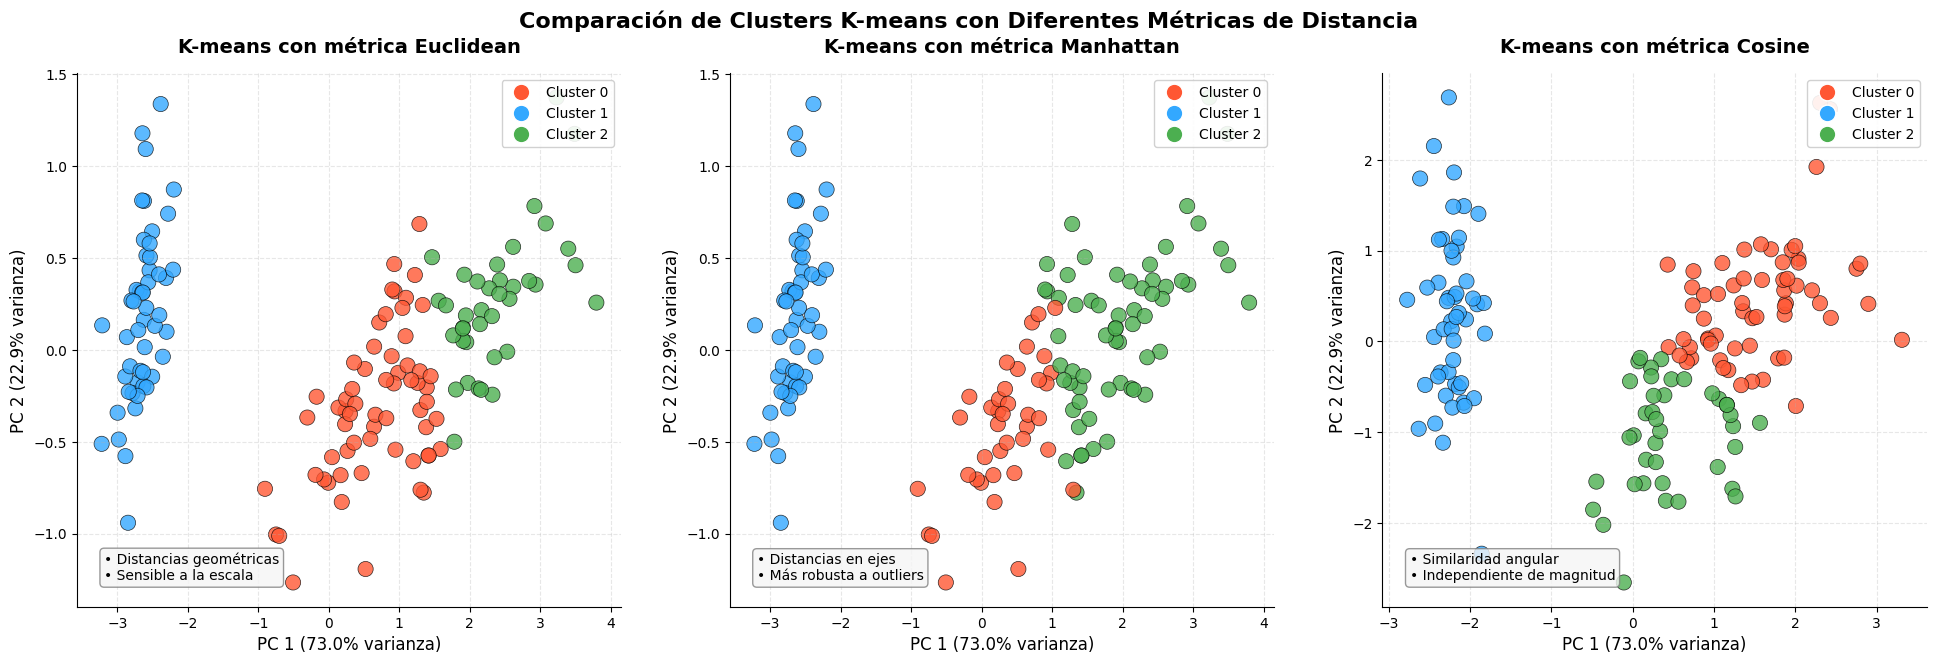

In [ ]:
# Crear una figura más elegante para comparar los resultados de k-means con diferentes métricas
plt.figure(figsize=(20, 7))

# Lista de métricas para iterar
metrics = ['Euclidean', 'Manhattan', 'Cosine']
X_pcas = [X_pca2, X_pca3, X_pca]  # X_pca was already calculated in the 'Cosine' section
labels_preds = [labels_pred2, labels_pred3, y_pred]  # Use y_pred from the 'Cosine' section


# Definir una paleta de colores personalizada más distintiva
colors = ['#FF5733', '#33A8FF', '#4CAF50']
cmap = plt.cm.colors.ListedColormap(colors)

# Calcular la varianza explicada por los componentes principales para etiquetar los ejes
pca_variance2 = pca.explained_variance_ratio_

for i, (metric, X_pca, labels) in enumerate(zip(metrics, X_pcas, labels_preds)):
    ax = plt.subplot(1, 3, i+1)

    # Crear un scatter plot con bordes negros para mejor visibilidad
    scatter = ax.scatter(
        X_pca[:, 0], X_pca[:, 1],
        c=labels,
        cmap=cmap,
        marker='o',
        s=120,
        alpha=0.8,
        edgecolor='black',
        linewidth=0.5
    )

    # Añadir títulos y etiquetas más descriptivos
    ax.set_title(f'K-means con métrica {metric}', fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel(f'PC 1 ({pca_variance2[0]:.1%} varianza)', fontsize=12)
    ax.set_ylabel(f'PC 2 ({pca_variance2[1]:.1%} varianza)', fontsize=12)

    # Añadir una leyenda para identificar los clusters
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[j],
                  markersize=12, label=f'Cluster {j}')
        for j in range(len(np.unique(labels)))
    ]
    ax.legend(handles=legend_elements, loc='upper right', frameon=True,
             framealpha=0.9, fontsize=10)

    # Añadir una cuadrícula para facilitar la interpretación
    ax.grid(True, linestyle='--', alpha=0.3)

    # Aplicar un estilo más limpio al gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Añadir anotaciones con las características de cada métrica
    if i == 0:
        ax.annotate('• Distancias geométricas\n• Sensible a la escala',
                   xy=(0.05, 0.05), xycoords='axes fraction',
                   bbox=dict(boxstyle="round,pad=0.3", fc="whitesmoke", ec="gray", alpha=0.8),
                   fontsize=10)
    elif i == 1:
        ax.annotate('• Distancias en ejes\n• Más robusta a outliers',
                   xy=(0.05, 0.05), xycoords='axes fraction',
                   bbox=dict(boxstyle="round,pad=0.3", fc="whitesmoke", ec="gray", alpha=0.8),
                   fontsize=10)
    else:
        ax.annotate('• Similaridad angular\n• Independiente de magnitud',
                   xy=(0.05, 0.05), xycoords='axes fraction',
                   bbox=dict(boxstyle="round,pad=0.3", fc="whitesmoke", ec="gray", alpha=0.8),
                   fontsize=10)

# Ajustar el espaciado entre subplots
plt.tight_layout(pad=3.0)

# Añadir un título general para la figura completa
plt.suptitle('Comparación de Clusters K-means con Diferentes Métricas de Distancia',
             fontsize=16, fontweight='bold', y=0.98)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have start_chunk4 and end_chunk4 defined somewhere in your code before this cell
# If not, define them before calculating t4

# For example:
# start_chunk4 = time.time()
# # ... your code for chunk 4 ...
# end_chunk4 = time.time()

# Assuming you have the accuracy and ARI score for chunk 4 as well
# For example:
# overall_accuracy4 = ...
# ari_score4 = ...


# Calculamos los tiempos de ejecución
t2 = end_chunk2 - start_chunk2
t3 = end_chunk3 - start_chunk3
# Calculamos t4 si start_chunk4 y end_chunk4 están definidos
if 'start_chunk4' in locals() and 'end_chunk4' in locals():
    t4 = end_chunk4 - start_chunk4
else:
    t4 = np.nan  # Asignamos NaN si no está definido para evitar errores

# Creamos el DataFrame con los datos de comparación
# Si overall_accuracy4 y ari_score4 no están definidos, reemplázalos por np.nan o un valor apropiado
comparison_data = {
    'Precisión General': [overall_accuracy2, overall_accuracy3, overall_accuracy4 if 'overall_accuracy4' in locals() else np.nan],  # Reemplaza por np.nan o el valor deseado
    'Índice Rand Ajustado': [ari_score2, ari_score3, ari_score4 if 'ari_score4' in locals() else np.nan],  # Reemplaza por np.nan o el valor deseado
    'Tiempo de Cómputo (s)': [t2, t3, t4]
}

# ... (resto del código)
# Definimos un índice más descriptivo
metrics_index = ['Euclidiana', 'Manhattan', 'Coseno']

# Creamos el DataFrame
comparison_table = pd.DataFrame(comparison_data, index=metrics_index)

# Formateamos los valores numéricos para mejor presentación
comparison_table['Precisión General'] = comparison_table['Precisión General'].map('{:.4f}'.format)
comparison_table['Índice Rand Ajustado'] = comparison_table['Índice Rand Ajustado'].map('{:.4f}'.format)
comparison_table['Tiempo de Cómputo (s)'] = comparison_table['Tiempo de Cómputo (s)'].map('{:.4f}'.format)

# Identificamos la mejor métrica para cada columna
best_accuracy = comparison_table['Precisión General'].astype(float).idxmax()
best_ari = comparison_table['Índice Rand Ajustado'].astype(float).idxmax()
best_time = comparison_table['Tiempo de Cómputo (s)'].astype(float).idxmin()

# Visualizamos la tabla con estilos avanzados
styled_table = comparison_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'),
                                ('color', '#333'),
                                ('font-weight', 'bold'),
                                ('text-align', 'center'),
                                ('border', '1px solid #ddd'),
                                ('padding', '8px')]},
    {'selector': 'td', 'props': [('text-align', 'center'),
                                ('border', '1px solid #ddd'),
                                ('padding', '8px')]},
    {'selector': 'caption', 'props': [('caption-side', 'top'),
                                     ('font-size', '1.2em'),
                                     ('font-weight', 'bold'),
                                     ('color', '#333'),
                                     ('text-align', 'center'),
                                     ('padding', '10px')]}
]).set_caption('Comparación de K-means con Diferentes Métricas')

# Destacamos los mejores valores para cada métrica
styled_table = styled_table.apply(lambda x: np.where(x.index == best_accuracy, 'background-color: #c6efce; color: #006100;', ''), axis=0, subset=['Precisión General'])
styled_table = styled_table.apply(lambda x: np.where(x.index == best_ari, 'background-color: #c6efce; color: #006100;', ''), axis=0, subset=['Índice Rand Ajustado'])
styled_table = styled_table.apply(lambda x: np.where(x.index == best_time, 'background-color: #c6efce; color: #006100;', ''), axis=0, subset=['Tiempo de Cómputo (s)'])

# Mostramos la tabla estilizada
styled_table

,Precisión General,Índice Rand Ajustado,Tiempo de Cómputo (s)
Euclidiana,0.8933,0.7302,1.6703
Manhattan,0.9000,0.7437,0.5686
Coseno,nan,nan,nan


**Conforme a los resultados obtenidos cabe resaltar que no se encontró diferencia significativa entre las dos métricas resultantes, puesto que al analisar un punto diferencial mayoritario vemos cómo el tiempo de computo decantó más a favor de la metrica de Manhattan siendo relevantemente superior con 0.56 (s) frente a los 1.67 de Euclidiana, no está demás tenerla presente para próximos análisis.**

4. Comparación de tiempo de ejecución con diferentes inicializaciones: K-means puede ser sensible a las inicializaciones. ¿Cómo afecta el número de inicializaciones aleatorias (n_init) al tiempo de ejecución y al resultado final de los clusters? Prueba con n_init=1, n_init=10 y n_init=100. Deben implementar k-means con diferentes valores de n_init y analizar el impacto en tiempo de ejecución, estabilidad de los clusters y calidad de los resultados (usando métricas como el coeficiente de silueta o la distancia intra-cluster).

In [ ]:
numinit=[1,10,100]
kmeanlist=[]
timelist=[]
timesil=[]
timedunn=[]
silhouette_scores = []
for i,ninit in enumerate(numinit):
  start_chunk5 = time.time()
  kmeanlist.append(KMeans(n_clusters=3, n_init=numinit[i], random_state=42))
  timelist.append(time.time()-start_chunk5)
  etiquetas = kmeanlist[i].fit_predict(X)
  start_chunk6 = time.time()
  score = silhouette_score(X, etiquetas)
  timesil.append(time.time()-start_chunk6)
  silhouette_scores.append(score)
  start_chunk7 = time.time()
  calculate_dunn_index(X, etiquetas)
  timedunn.append(time.time()-start_chunk7)


In [ ]:


import pandas as pd

# Creamos un DataFrame reorganizado para mayor claridad
tiempos_data = {
    'Algoritmo': ['K-means', 'Silhouette', 'Dunn Index'],
    '1 inicialización': [timelist[0], timesil[0], timedunn[0]],
    '10 inicializaciones': [timelist[1], timesil[1], timedunn[1]],
    '100 inicializaciones': [timelist[2], timesil[2], timedunn[2]]
}


tiempos_tabla = pd.DataFrame(tiempos_data)

tiempos_tabla = tiempos_tabla.set_index('Algoritmo')

tiempos_tabla = tiempos_tabla.applymap(lambda x: f"{x:.4f}s")

# Mostramos la tabla
tiempos_tabla

<ipython-input-35-8d2d170f925b>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tiempos_tabla = tiempos_tabla.applymap(lambda x: f"{x:.4f}s")


,1 inicialización,10 inicializaciones,100 inicializaciones
Algoritmo,,,
K-means,0.0000s,0.0000s,0.0000s
Silhouette,0.0028s,0.0025s,0.0024s
Dunn Index,0.0080s,0.0051s,0.0008s


**Los tiempos obtenidos se realizaron con 3 clusters y la data Iris. Para el calculo del algoritmo de kmeans se obtienen tiempo de ejecucion mas bajos con todos los n_init . En cuanto al calculo del coeficiente de silueta con n_init de 10 y 100, se obtienen los calculos mas rapidos con sólo 1 segundo de diferencia y lo que si más se notó es el resago en n_init 1. El indice dunn evalua la calidad de los clusters usando las distancias intra e inter cluster, para este indice el tiempo de ejecucion para n_int 1,10 y 100 presentan muchas diferencias siendo en init 1 la más resagada, se puede concluir de que con n_init de 1 en general los algortimos son un poco mas lentos en ejecutarse, es de resaltar que la forma mas cercana a lo real es llevar a cabo un gran numero de simulaciones, hallar su tiempo de ejecicion promedio, y asi obtener conclusiones mas precisa, pero debido a lo planteado, tan solo se realizaron las ejecuciones solicitadas.**

In [ ]:
!ls

sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Taller6_K_means_Carlos_Vergara.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Taller6_K_means_Carlos_Vergara.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 2980789 bytes to /content/drive/MyDrive/Colab Notebooks/Taller6_K_means_Carlos_Vergara.html
